# S11 T01: Practicant amb training i test sets

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats


## Nivell 1

- Exercici 1

Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [4]:
flights = pd.read_csv("../db/Flights/DelayedFlights.csv", index_col=0)

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
pd.set_option('float_format', '{:.2f}'.format)
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.00,1955,2211.00,2225,WN,335,...,4.00,8.00,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.00,735,1002.00,1000,WN,3231,...,5.00,10.00,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.00,620,804.00,750,WN,448,...,3.00,17.00,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.00,1755,1959.00,1925,WN,3920,...,3.00,10.00,0,N,0,2.00,0.00,0.00,0.00,32.00
5,2008,1,3,4,1940.00,1915,2121.00,2110,WN,378,...,4.00,10.00,0,N,0,NaN,NaN,NaN,NaN,NaN


In [6]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936758 entries, 0 to 7009727
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [7]:
flights.describe(include='all')

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.00,1936758.00,1936758.00,1936758.00,1936758.00,1936758.00,1929648.00,1936758.00,1936758,1936758.00,...,1929648.00,1936303.00,1936758.00,1936758,1936758.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,...,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,NaN,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377602,NaN,...,NaN,NaN,NaN,1936125,NaN,NaN,NaN,NaN,NaN,NaN
mean,2008.00,6.11,15.75,3.98,1518.53,1467.47,1610.14,1634.22,NaN,2184.26,...,6.81,18.23,0.00,NaN,0.00,19.18,3.70,15.02,0.09,25.30
std,0.00,3.48,8.78,2.00,450.49,424.77,548.18,464.63,NaN,1944.70,...,5.27,14.34,0.02,NaN,0.06,43.55,21.49,33.83,2.02,42.05
min,2008.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,NaN,1.00,...,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00
25%,2008.00,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,NaN,610.00,...,4.00,10.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00
50%,2008.00,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,NaN,1543.00,...,6.00,14.00,0.00,NaN,0.00,2.00,0.00,2.00,0.00,8.00
75%,2008.00,9.00,23.00,6.00,1900.00,1815.00,2030.00,2014.00,NaN,3422.00,...,8.00,21.00,0.00,NaN,0.00,21.00,0.00,15.00,0.00,33.00


In [8]:
flights.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [9]:
flights = flights[(flights.AirTime.notna()) & (flights.TailNum.notna())]
flights.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         680882
WeatherDelay         680882
NASDelay             680882
SecurityDelay        680882
LateAircraftDelay    680882
dtype: int64

In [10]:
flights = flights.fillna(0)
flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

flights_train, flights_test = train_test_split(flights, random_state=42)

In [12]:
flights_train.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1446276.00,1446276.00,1446276.00,1446276.00,1446276.00,1446276.00,1446276.00,1446276.00,1446276.00,1446276.00,...,1446276.00,1446276.00,1446276.00,1446276.00,1446276.00,1446276.00,1446276.00,1446276.00,1446276.00,1446276.00
mean,2008.00,6.11,15.76,3.99,1518.87,1468.05,1610.53,1634.42,2184.82,133.24,...,764.31,6.81,18.22,0.00,0.00,12.42,2.39,9.73,0.06,16.39
std,0.00,3.48,8.78,2.00,450.47,424.61,547.86,464.49,1944.28,72.01,...,573.29,5.27,14.33,0.00,0.00,36.27,17.31,28.19,1.62,35.95
min,2008.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,14.00,...,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2008.00,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,611.00,80.00,...,338.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2008.00,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,1544.00,116.00,...,606.00,6.00,14.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2008.00,9.00,23.00,6.00,1901.00,1816.00,2031.00,2015.00,3427.00,165.00,...,997.00,8.00,21.00,0.00,0.00,10.00,0.00,6.00,0.00,18.00
max,2008.00,12.00,31.00,7.00,2400.00,2359.00,2400.00,2359.00,9741.00,790.00,...,4962.00,200.00,393.00,0.00,0.00,2436.00,1352.00,1357.00,392.00,1316.00


In [13]:
flights_test.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,482092.00,482092.00,482092.00,482092.00,482092.00,482092.00,482092.00,482092.00,482092.00,482092.00,...,482092.00,482092.00,482092.00,482092.00,482092.00,482092.00,482092.00,482092.00,482092.00,482092.00
mean,2008.00,6.10,15.74,3.98,1517.99,1466.72,1609.38,1633.51,2182.71,133.50,...,766.87,6.82,18.20,0.00,0.00,12.37,2.42,9.68,0.06,16.29
std,0.00,3.48,8.78,2.00,450.32,425.07,548.44,465.06,1944.95,72.20,...,575.67,5.26,14.24,0.00,0.00,35.99,17.56,27.99,1.64,35.84
min,2008.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,15.00,...,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2008.00,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,610.00,80.00,...,338.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2008.00,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,1540.00,116.00,...,607.00,6.00,14.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2008.00,9.00,23.00,6.00,1900.00,1815.00,2030.00,2014.00,3415.00,165.00,...,999.00,8.00,21.00,0.00,0.00,10.00,0.00,6.00,0.00,18.00
max,2008.00,12.00,31.00,7.00,2400.00,2359.00,2400.00,2359.00,9740.00,1114.00,...,4962.00,240.00,422.00,0.00,0.00,1707.00,1297.00,1195.00,254.00,1254.00


In [14]:
from scipy import stats

alpha = 0.05

for item in list(flights_test.select_dtypes(exclude='object').columns):
    stat, p = stats.ttest_ind(flights_train[item], flights_test[item], alternative= 'two-sided')
    if p > alpha:
	    print(f'{item}:, stat: {stat}, p: {p}, alpha:{alpha}, H0 not refused. Probably the same distribution')
    else:
	    print(f'{item}:, stat: {stat}, p: {p}, alpha:{alpha} H0 refused. Probably different distributions')

Year:, stat: nan, p: nan, alpha:0.05 H0 refused. Probably different distributions
Month:, stat: 0.9604638700922437, p: 0.3368219267744693, alpha:0.05, H0 not refused. Probably the same distribution
DayofMonth:, stat: 1.5123925289060045, p: 0.13043419827943378, alpha:0.05, H0 not refused. Probably the same distribution
DayOfWeek:, stat: 1.5221992784631793, p: 0.1279593198504131, alpha:0.05, H0 not refused. Probably the same distribution
DepTime:, stat: 1.1647036638212886, p: 0.24413910951134035, alpha:0.05, H0 not refused. Probably the same distribution
CRSDepTime:, stat: 1.8809578378038991, p: 0.059977804984479466, alpha:0.05, H0 not refused. Probably the same distribution
ArrTime:, stat: 1.2567090241984158, p: 0.2088591714179177, alpha:0.05, H0 not refused. Probably the same distribution
CRSArrTime:, stat: 1.180161334209278, p: 0.23793619974810815, alpha:0.05, H0 not refused. Probably the same distribution
FlightNum:, stat: 0.6541105487339459, p: 0.5130406638129466, alpha:0.05, H0 not

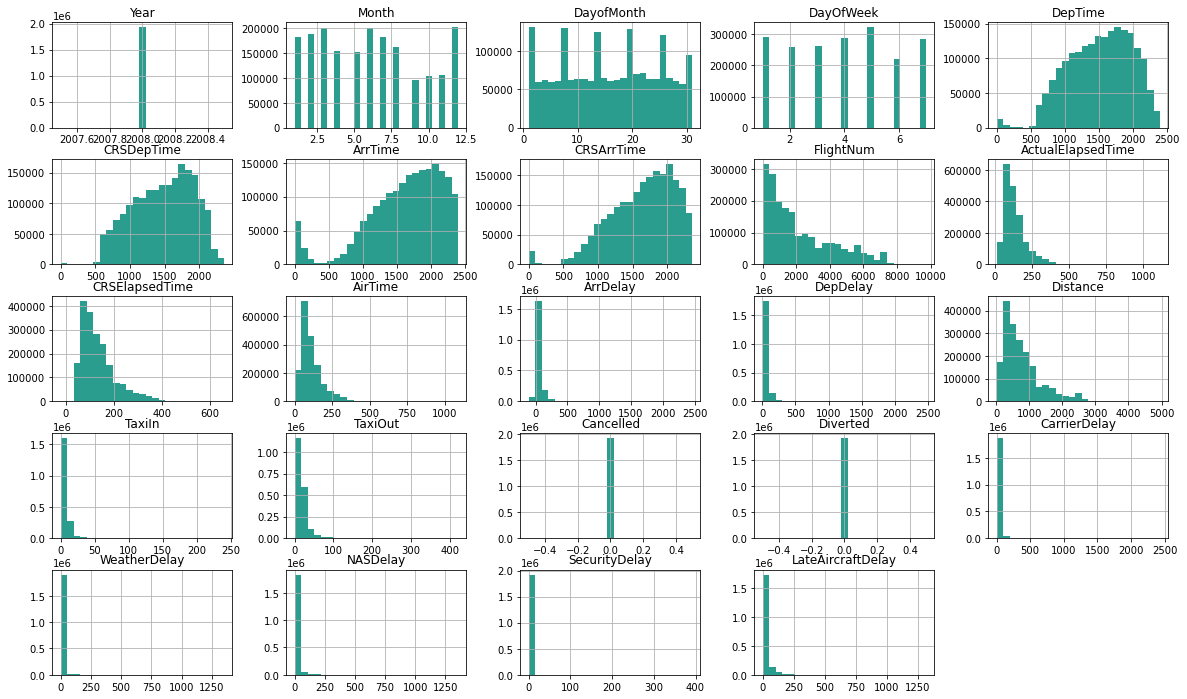

In [18]:
flights.select_dtypes(exclude='object').hist(figsize=(20, 12), color='#2a9d8f', bins=25)
plt.show()

In [16]:
flights_train.select_dtypes(include='object').describe()

,UniqueCarrier,TailNum,Origin,Dest,CancellationCode
count,1446276,1446276,1446276,1446276,1446276
unique,20,5355,302,301,1
top,WN,N676SW,ATL,ORD,N
freq,281799,741,98500,81198,1446276


In [17]:
flights_test.select_dtypes(include='object').describe()

,UniqueCarrier,TailNum,Origin,Dest,CancellationCode
count,482092,482092,482092,482092,482092
unique,20,5319,301,301,1
top,WN,N658SW,ATL,ORD,N
freq,94402,258,32713,27067,482092


## Nivell 2

- Exercici 2

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

## Nivell 3

- Exercici 3

Resumeix les noves columnes generades de manera estadística i gràfica